In [1]:
import pymc as pm

In [2]:
with pm.Model() as laplace_dp_no_obs:
    DB_size = 20
    num_lower = 2
    inc_lower = pm.Uniform('inc_lower',200, 400, shape=num_lower)
    inc_higher = pm.Uniform('inc_higher',300, 600, shape=DB_size-num_lower)
    avg_income = (inc_lower.sum() + inc_higher.sum()) / DB_size
    Delta = 600/DB_size # sensitivity
    epsilon = 1
    noise = pm.Laplace('noise',mu=0,b=Delta/epsilon) # the variance of this Laplace distribution is 2b^2
    output = pm.Deterministic('output', avg_income + noise) # this operation only shifts the mean of the Laplace
    trace_no_obs = pm.sample(20000)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [inc_lower, inc_higher, noise]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 34 seconds.


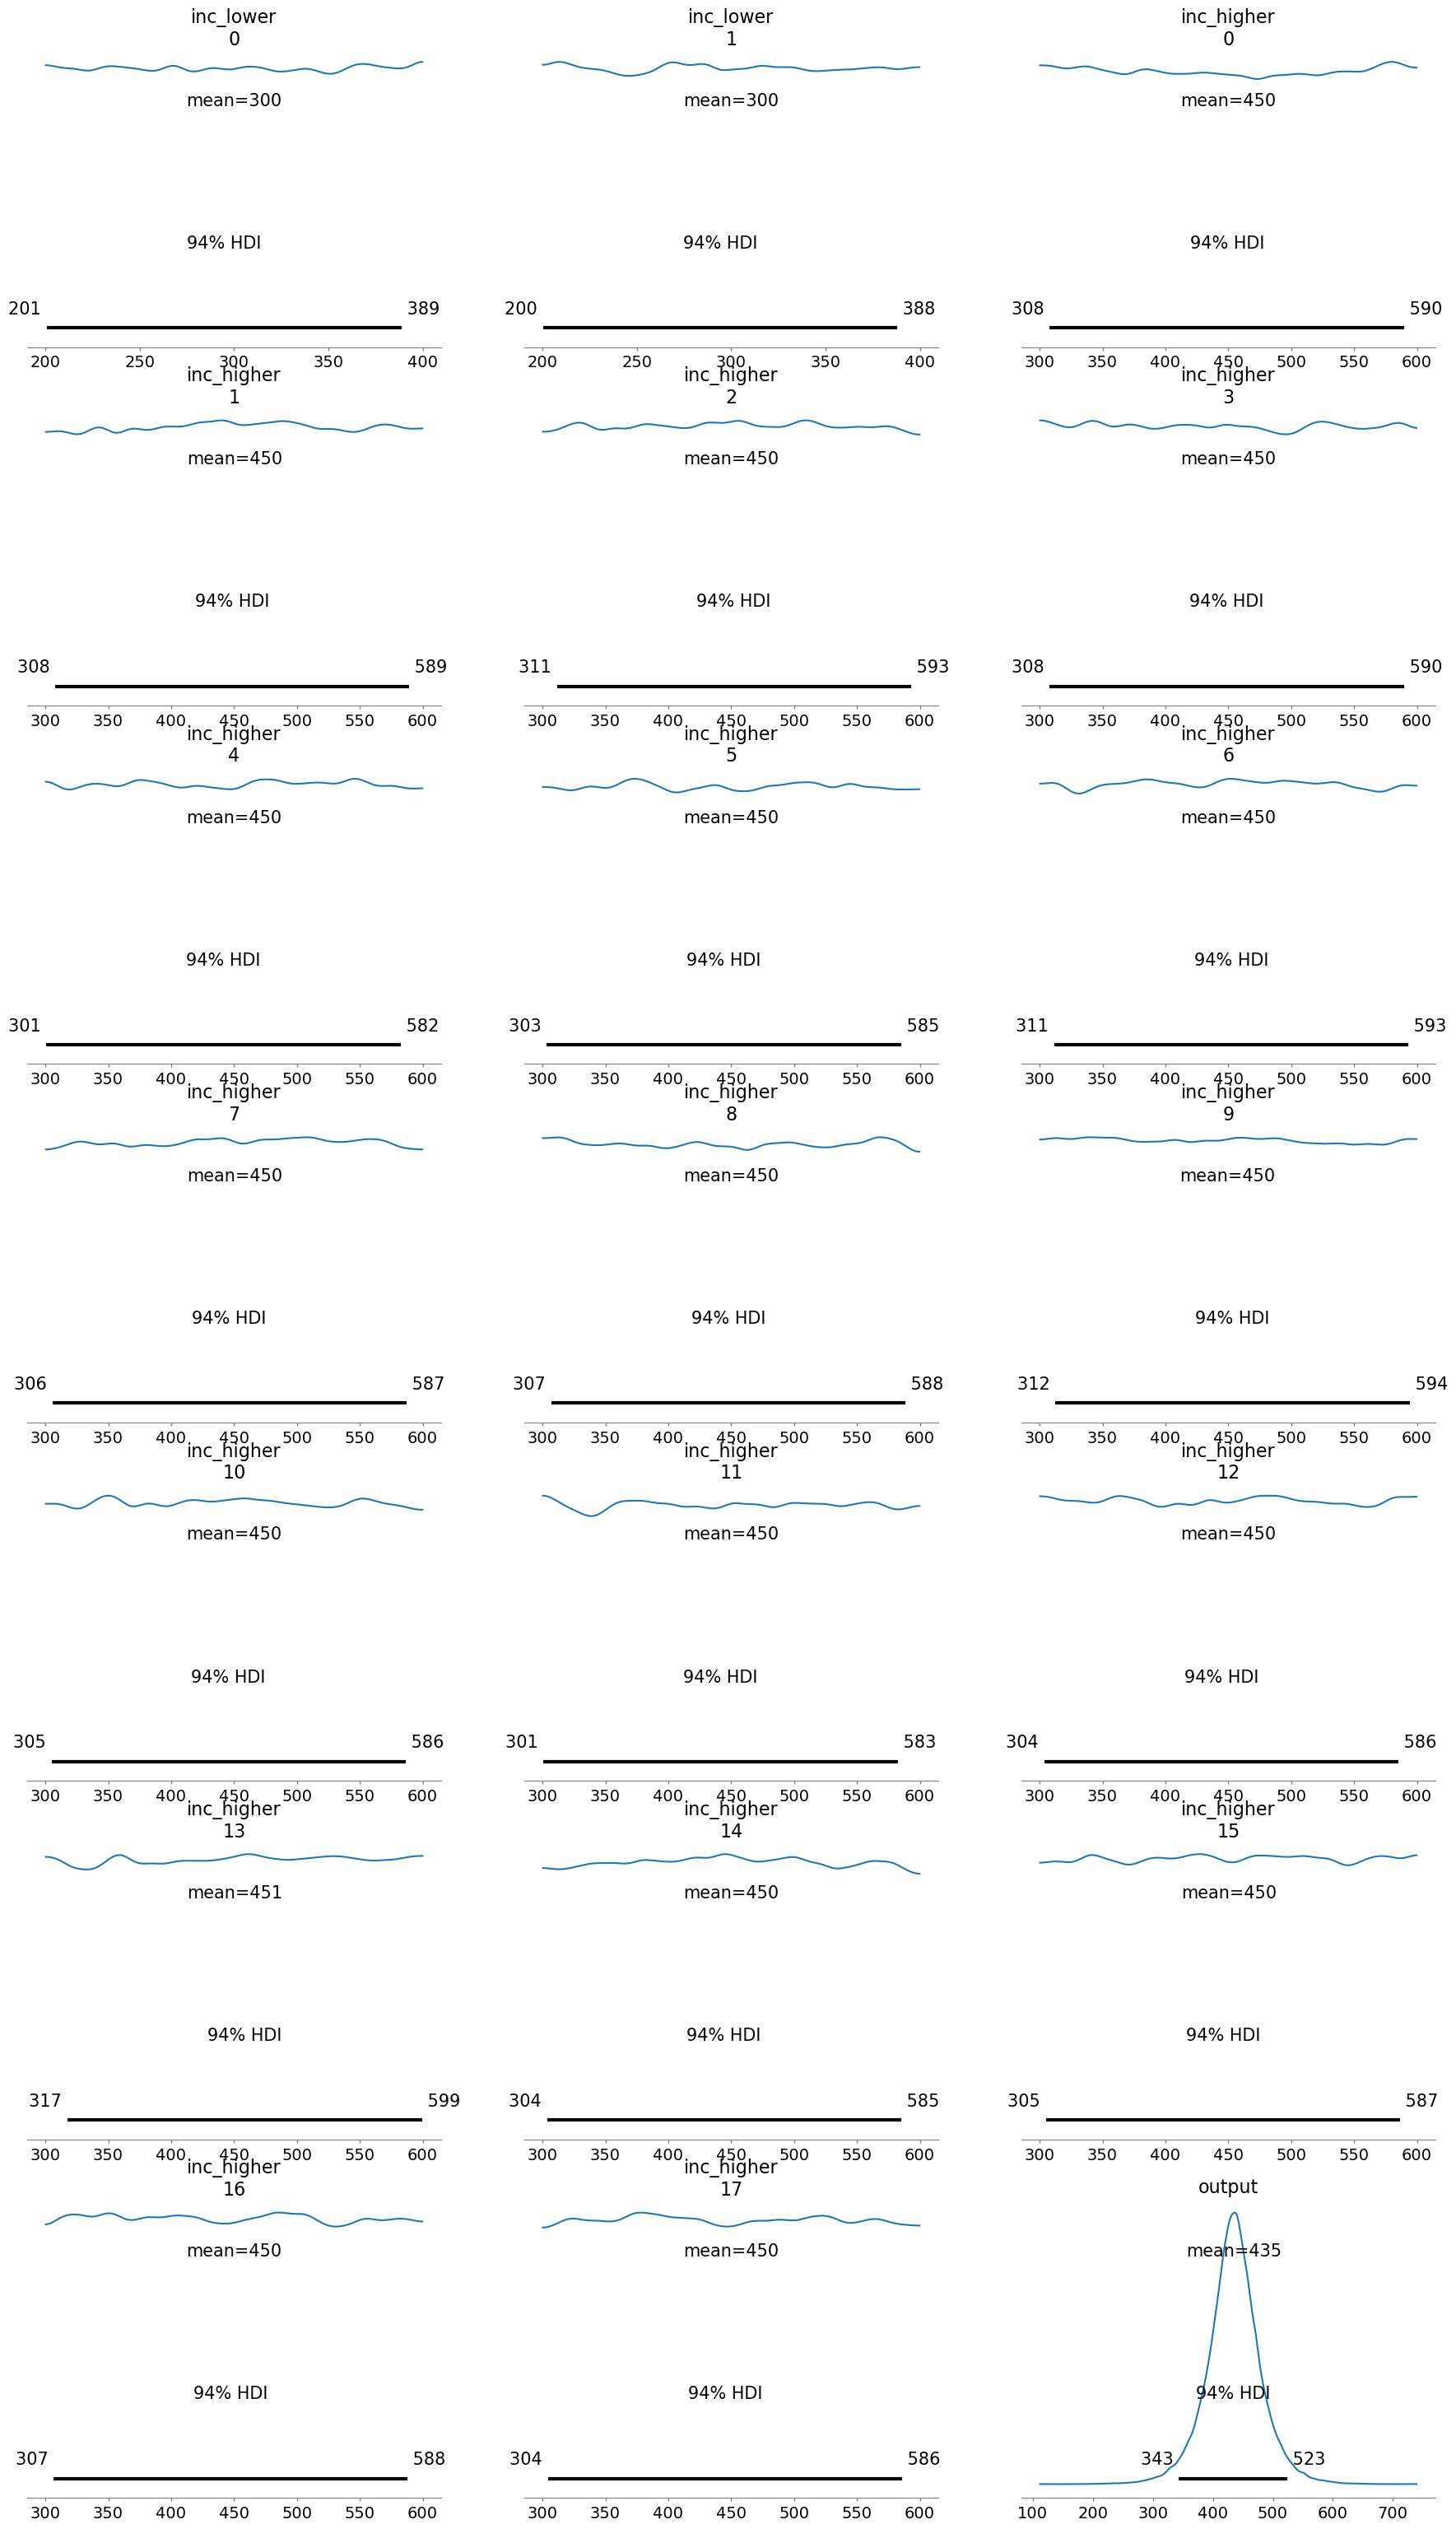

In [3]:
pm.plot_posterior(trace_no_obs, var_names=['inc_lower', 'inc_higher', 'output']);

In [4]:
with pm.Model() as laplace_dp_obs:
    DB_size = 10
    num_lower = 2
    inc_lower = pm.Uniform('inc_lower',50, 100, shape=num_lower)
    inc_higher = pm.Uniform('inc_higher',500, 600, shape=DB_size-num_lower)
    avg_income = (inc_lower.sum() + inc_higher.sum()) / DB_size
    Delta = 600/DB_size # sensitivity
    epsilon = 1
    noise = pm.Laplace('noise',mu=0,b=Delta/epsilon) # the variance of this Laplace distribution is 2b^2
    output = pm.Deterministic('output', avg_income + noise) # this operation only shifts the mean of the Laplace
    pm.Normal('obs',mu=output,sigma=0.1,observed=550)
    trace_obs = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [inc_lower, inc_higher, noise]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 708 seconds.


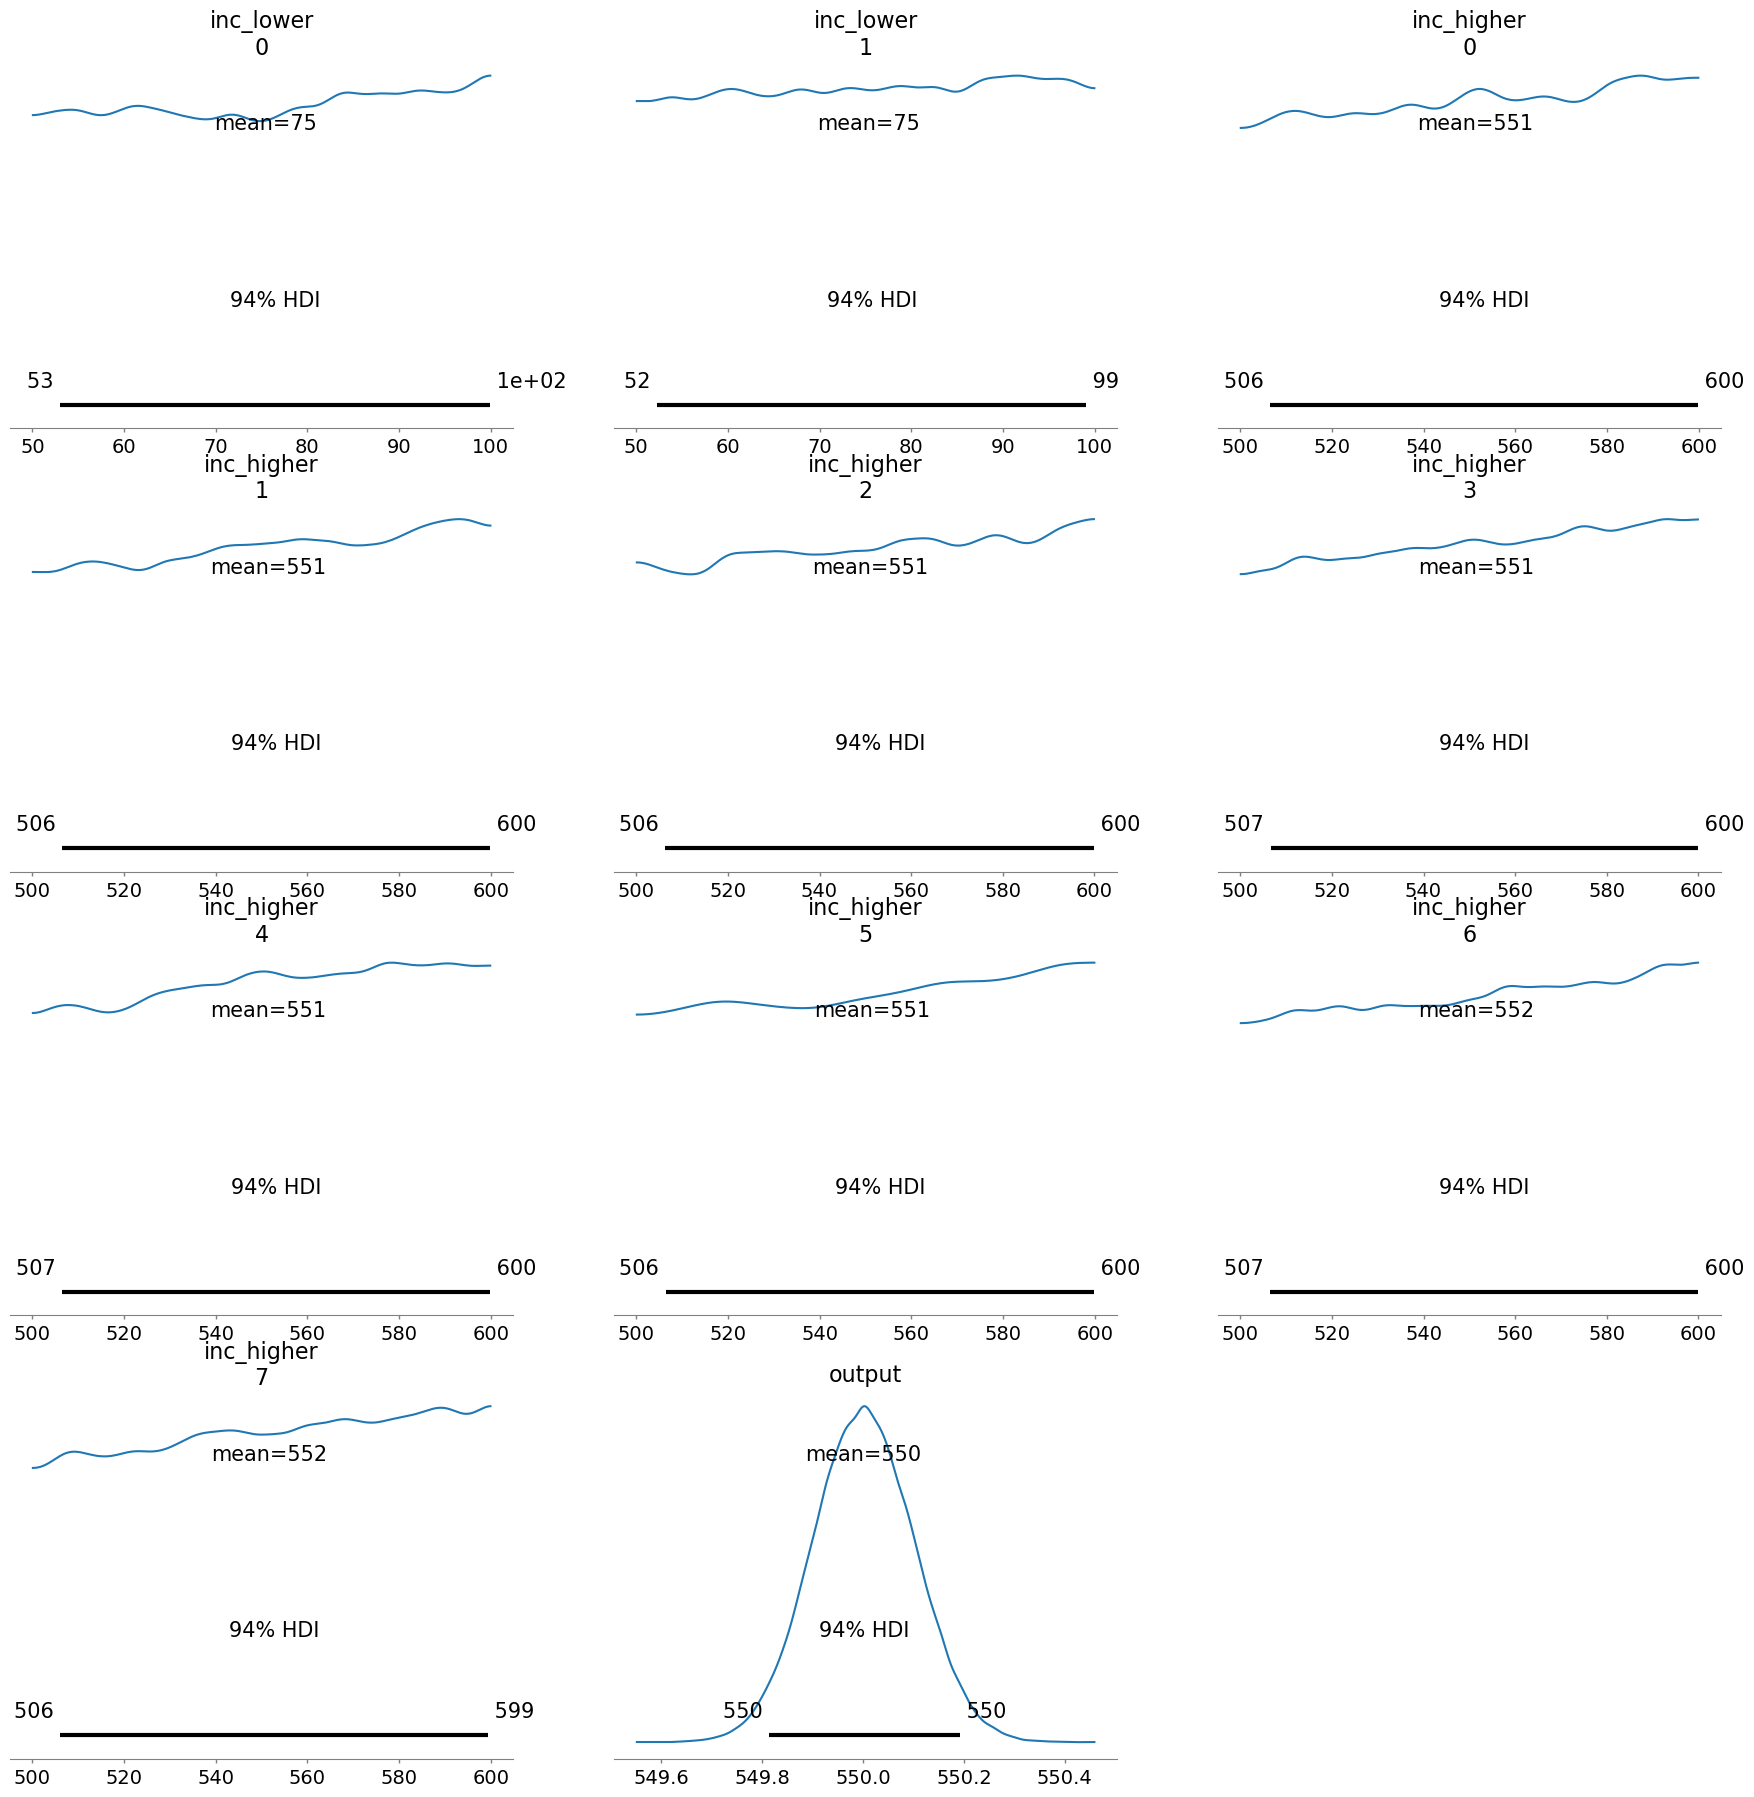

In [5]:
pm.plot_posterior(trace_obs, var_names=['inc_lower', 'inc_higher', 'output']);